# Assignment 5
(1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

(2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

(3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

(4) Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.  I MUST have your user name to verify submission status.

(5) The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. Provide your Kaggle.com score and user ID.

Report total elapsed time measures for the training set analysis.  It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

start=datetime.now()
rf2.fit(trainimages,labels)
end=datetime.now()
print(end-start)

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline
from datetime import datetime # Get current time

C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Import data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
# check on the training data information
print(train.shape)

(42000, 785)


The tasin dataset contains 42,000 rows and 785 columns.

In [4]:
# Check the first five row of training dataset
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the above information, we can see there are 784 pixel columns for pixel and label is  the number which represents.

In [5]:
# Check how many unique number in the label column
val=train['label'].unique()
print(sorted(val))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


We can see there is 10 different numbers, 0 to 8, on the lable column.

In [6]:
# Check is any missing data in training dataset
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

From the above information, we can see there is no missing values in the training dataset.

In [7]:
# Sort out our taining set
x=train.drop(['label'], axis=1)
y=train['label']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

# 1. Random Forest Model

In [8]:
# Build a Random Foresst model
rnd_clf=RandomForestClassifier(n_estimators=10, max_features = 'sqrt', bootstrap=True)
start=datetime.now()
rnd_clf.fit(x_train, y_train)
end=datetime.now()
print("Time spend:", end-start)

Time spend: 0:00:01.777277


In [9]:
# predict the test data
y_pred_rf=rnd_clf.predict(x_test)

In [10]:
# Classification Report
from sklearn import metrics

print(metrics.classification_report(y_pred_rf, y_test))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97       873
          1       0.98      0.97      0.98       949
          2       0.95      0.92      0.93       866
          3       0.90      0.91      0.91       865
          4       0.94      0.92      0.93       848
          5       0.91      0.90      0.91       738
          6       0.96      0.97      0.97       796
          7       0.94      0.95      0.94       834
          8       0.89      0.92      0.91       820
          9       0.90      0.93      0.91       811

avg / total       0.94      0.94      0.94      8400



* Precision:
    What percent of your predictions were correct?
    Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
    TP – True Positives
    FP – False Positives
    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)

* Recall: 
    What percent of the positive cases did you catch? 
    Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
    FN – False Negatives
    Recall: Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

* F1 score:
    What percent of positive predictions were correct? 
    The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
    F1 Score = 2*(Recall * Precision) / (Recall + Precision)

* Support:
    The support is the number of samples of the true response that lie in the class.

So from the above classification report, we can see this model has the highest precision score while predicting no.1. The models has worest precision rate while predictign 8 and 9. 

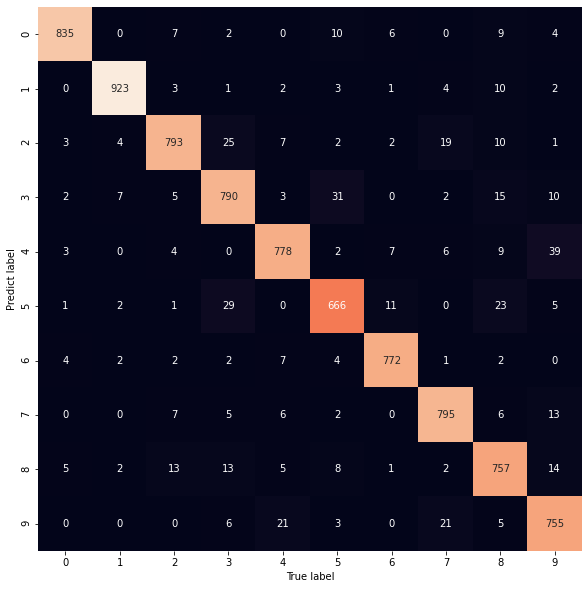

In [11]:
# Confusion Matrix on Heatmap

# Data visualization
import seaborn as sns
# Adj the size of heatmap
import matplotlib.pyplot as plt

# Confusion Matrix
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predict label')
plt.show()

From the above confusion matrix, we can see that 929 out of 940 while predicting the image of 1 is correct. This model might have hard time to identify the differene among 1, 2, and 3. Because there are 5 and 4 times misidentified 1 to 2 and 3.

In [12]:
# Create the prediction for the submission file
y_pred_test=rnd_clf.predict(test)

In [13]:
# Create the submission file format
submission_rnd_1=pd.DataFrame({"ImageId": test.index+1, "Label":y_pred_test})

In [14]:
# Review the file before creating the competition file
submission_rnd_1.head(3)

,ImageId,Label
0,1,2
1,2,0
2,3,9


In [15]:
# Create the submission file
submission_rnd_1.to_csv('rnd_1.csv', index=False)

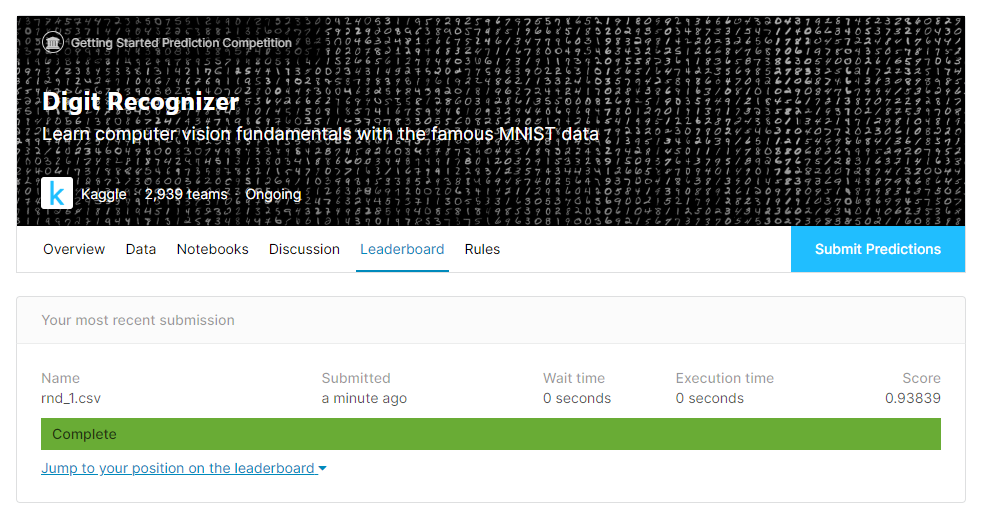

In [16]:
from IPython.display import Image
Image("Assignment_5_RF_1.PNG")

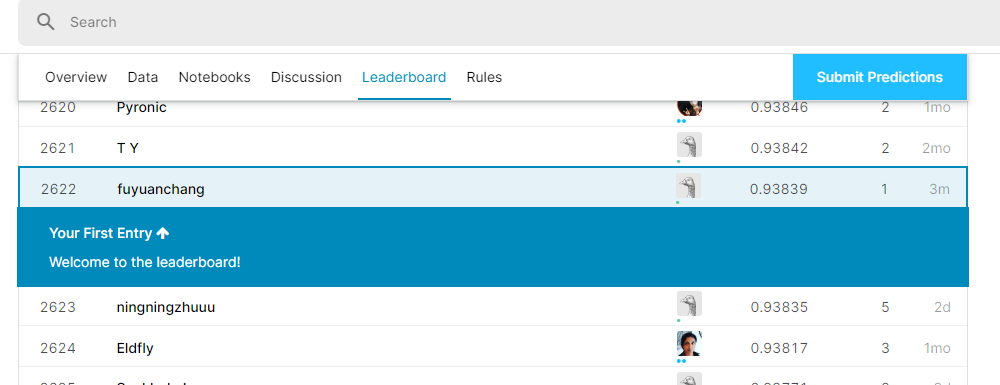

In [17]:
# The ranking of this submission
Image("Assignment_5_RF_1_ranking.PNG")

# 2. Random Forest Model - Principal Components Analysis (PCA) 

In [18]:
# Let's concatenate the train and test data
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train['label']
x_train=train.drop(['label'], axis=1)
all_data=np.concatenate((x_train,test), axis=0)
#all_data=pd.concat((train, test)).reset_index(drop=True)
#all_data.drop(['label'], axis=1, inplace=True)
print('All data size is :{}'.format(all_data.shape))

All data size is :(70000, 784)


In [19]:
# Reducing the variables 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
all_data=StandardScaler().fit_transform(all_data)
pca=PCA(n_components=0.95)
all_data=pca.fit_transform(all_data)

pca.n_components_

C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


332

With the 95% variance, we only need 332 variables, reducing from 784 variables. 

In [20]:
# Let's gt the new train and test dataset
train=all_data[:ntrain]
test=all_data[ntrain:]

In [22]:
# Sort out our taining set
x=train
y=y_train
x_train, x_test, y_train, y_test=train_test_split(x, y_train, test_size=0.2, random_state=1)

In [23]:
# Build a Random Foresst model - PCA
rnd_clf=RandomForestClassifier(n_estimators=10, max_features = 'sqrt', bootstrap=True)
start=datetime.now()
rnd_clf.fit(x_train, y_train)
end=datetime.now()
print("Time spend for RF-PCA:", end-start)

Time spend for RF-PCA: 0:00:05.984537


In [24]:
# predict the test data
y_pred_rf=rnd_clf.predict(x_test)

In [25]:
# Classification Report
from sklearn import metrics

print(metrics.classification_report(y_pred_rf, y_test))

             precision    recall  f1-score   support

          0       0.95      0.87      0.91       934
          1       0.97      0.95      0.96       960
          2       0.89      0.80      0.84       923
          3       0.83      0.79      0.81       912
          4       0.87      0.85      0.86       848
          5       0.79      0.84      0.82       692
          6       0.93      0.95      0.94       785
          7       0.86      0.87      0.87       844
          8       0.74      0.86      0.80       727
          9       0.80      0.87      0.83       775

avg / total       0.87      0.87      0.87      8400



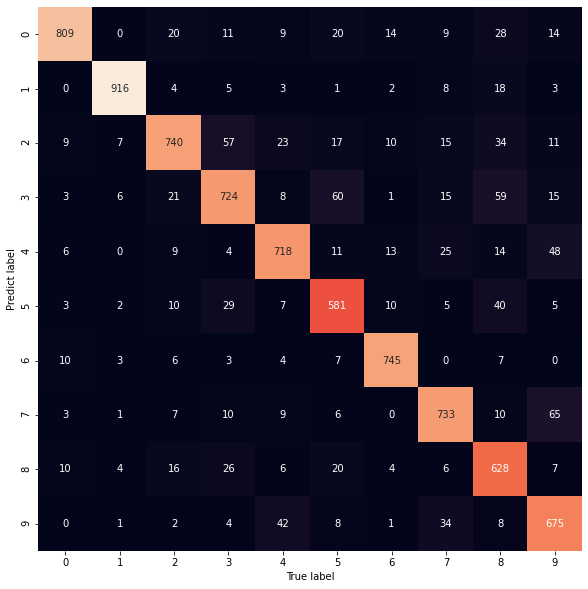

In [26]:
# Confusion Matrix on Heatmap

# Data visualization
import seaborn as sns
# Adj the size of heatmap
import matplotlib.pyplot as plt

# Confusion Matrix
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predict label')
plt.show()

From the heatmap and classification report, the advantage of using PCA is the reduction of variable and running time under the same Random Forest Model. However, it sacrifices the precision rate to 0.86 from 0.94. Is it worth to use the PCA if the time doesn't decrease significantly? We need to get balance between the precision rate and running time.  

In [27]:
# Create the prediction for the submission file
y_pred_test=rnd_clf.predict(test)

In [28]:
abc=pd.DataFrame(y_pred_test)
abc

,0
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [29]:
# Create the submission file format
submission_rnd_1=pd.DataFrame({"ImageId": abc.index+1, "Label":y_pred_test})

In [30]:
# Review the file before creating the competition file
submission_rnd_1.head(3)

,ImageId,Label
0,1,2
1,2,0
2,3,9


In [31]:
# Create the submission file
submission_rnd_1.to_csv('rnd_pca_1.csv', index=False)

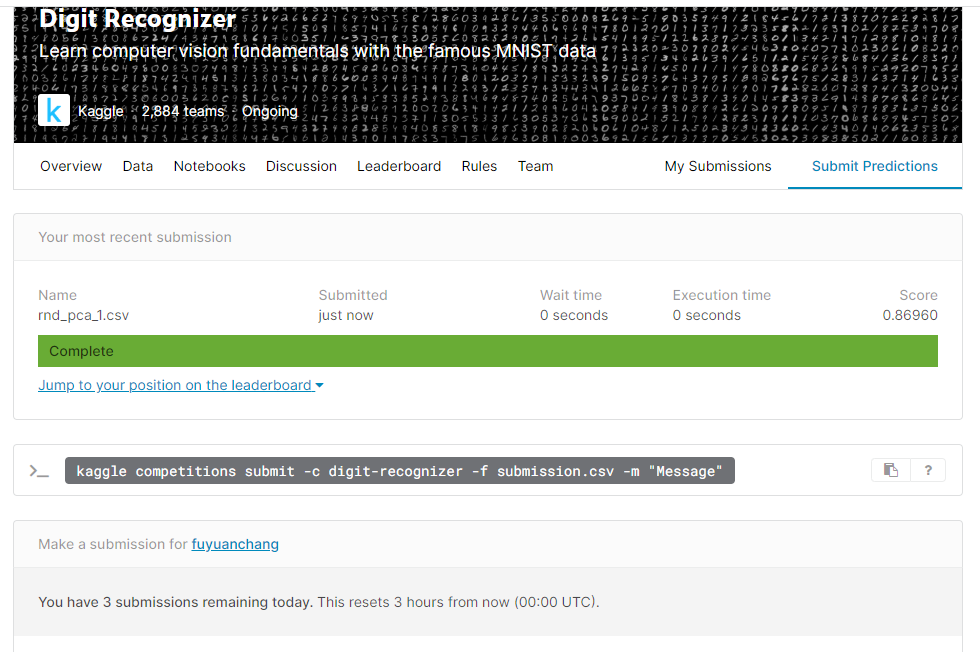

In [32]:
from IPython.display import Image
Image("Assignment_5_RF_PCA.PNG")

# Conclusion
PCA would decrease the variable and running time and the trade off would be the correction rate of prediction.